In [1]:
%load_ext autoreload
%autoreload 2

# Examples

In [2]:
from plotnine import (
    scale_color_manual, scale_shape_manual, scale_fill_manual,
    theme_minimal,
    aes
)
from plotnine3d import ggplot_3d, geom_point_3d
from plotnine.data import mtcars

In [3]:
mtcars['transmission'] = mtcars['am'].replace({0: 'automatic', 1: 'manual'})
mtcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,transmission
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,manual
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,manual
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,manual
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,automatic
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,automatic


## Scatter

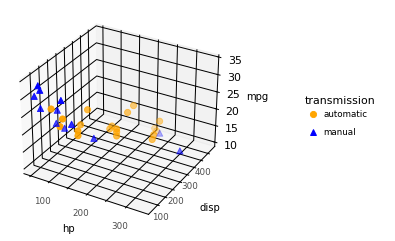

<ggplot: (8764702839851)>

In [4]:
p = (
    ggplot_3d(mtcars)
    + aes(
        x='hp', y='disp', z='mpg',
        shape='transmission', color='transmission'
    )
    + theme_minimal()
    + scale_shape_manual(values={'automatic': 'o', 'manual': '^'})
    + scale_color_manual(values={'automatic': 'orange', 'manual': 'blue'})
)
p + geom_point_3d(size=3)

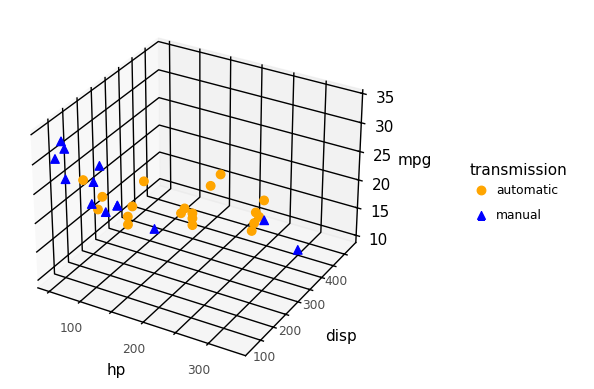

<ggplot: (8764702836104)>

In [5]:
p + geom_point_3d(size=3, depthshade=False)

Easier to read with dark outline:

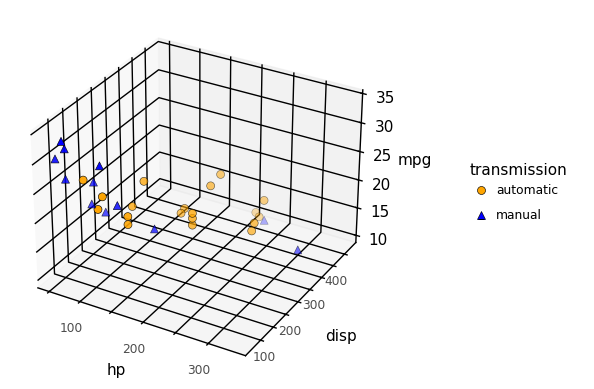

<ggplot: (8764698995469)>

In [6]:
(
    p
    + aes(fill='transmission')
    + geom_point_3d(stroke=0.25, size=3, color='black')
    + scale_fill_manual(values={'automatic': 'orange', 'manual': 'blue'})
)

Both fill and colour can be mapped:

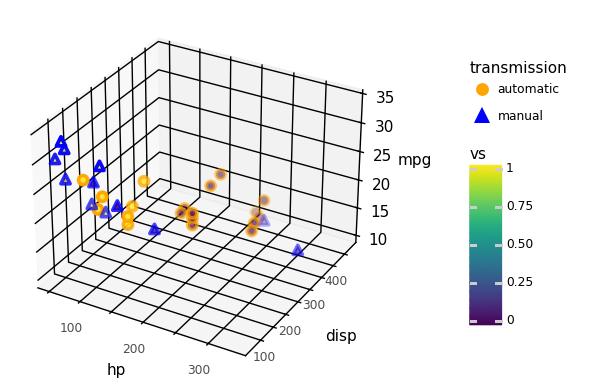

<ggplot: (8764698963005)>

In [7]:
p + aes(fill='vs') + geom_point_3d(stroke=1.5, size=2.2)

In [8]:
from plotnine3d import zlab

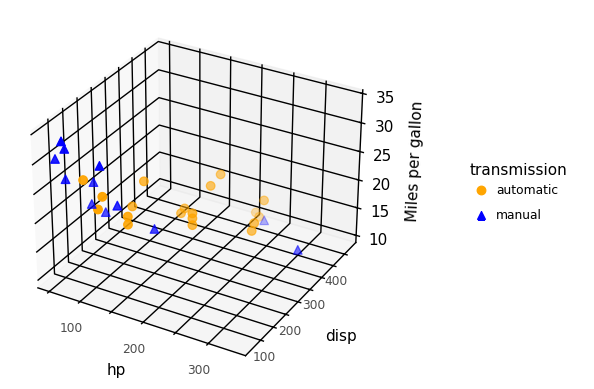

<ggplot: (8764698888927)>

In [9]:
p + geom_point_3d(size=3) + zlab('Miles per gallon')

## Text

In [10]:
from plotnine3d import geom_text_3d

Note: text does not expand z axis, so to make it work you need to add points first:

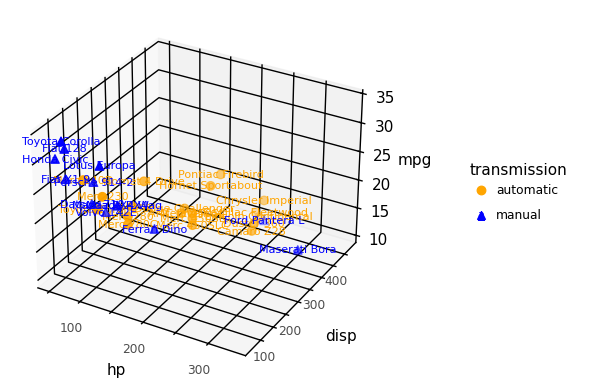

<ggplot: (8764698840884)>

In [11]:
p + geom_point_3d(size=3) + geom_text_3d(aes(label='name'), size=8)

In [12]:
mtcars['zdir'] = mtcars.apply(
    lambda x: (
        'z' if x['mpg'] > 25 else (
            'y' if x['disp'] > 300 else 'x'
        )
    ),
    axis=1
)

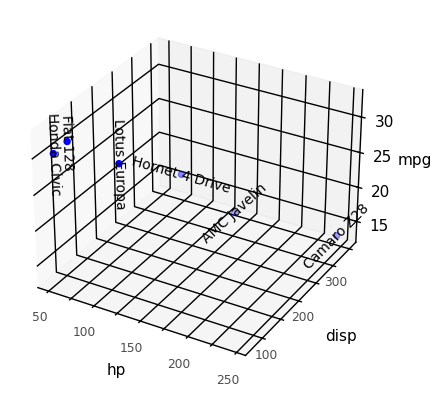

<ggplot: (8764698947729)>

In [13]:
(
    ggplot_3d(mtcars.sample(6, random_state=1))
    + aes(x='hp', y='disp', z='mpg')
    + theme_minimal()
    + geom_point_3d(size=2, color='blue')
    + geom_text_3d(aes(label='name', zdir='zdir'), size=10)
)

## Label

In [14]:
from plotnine3d import geom_label_3d

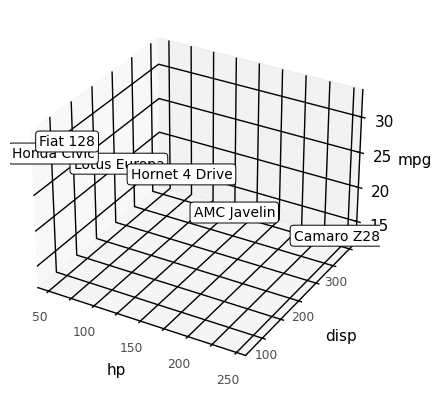

<ggplot: (8764698892213)>

In [15]:
(
    ggplot_3d(mtcars.sample(6, random_state=1))
    + aes(x='hp', y='disp', z='mpg')
    + theme_minimal()
    + geom_point_3d(size=2, color='blue')
    + geom_label_3d(aes(label='name'), size=10)
)

## Surface

In [16]:
import pandas as pd
import numpy as np

In [17]:
from plotnine3d import geom_polygon_3d

In [18]:
z_data = pd.read_csv('data/mt_bruno_elevation.csv', index_col=0)
z_data.iloc[:3, :3]

,0,1,2
0,27.80985,49.61936,83.08067
1,27.71966,48.55022,65.21374
2,30.42670,33.47752,44.80953


Transform data into long format:

In [19]:
z = z_data.values
nrows, ncols = z.shape
x, y = np.linspace(0, 1, nrows), np.linspace(0, 1, ncols)
x, y = np.meshgrid(x, y)
mt_bruno_long = pd.DataFrame(
    {'x': x.flatten(), 'y': y.flatten(), 'height': z.flatten()}
)

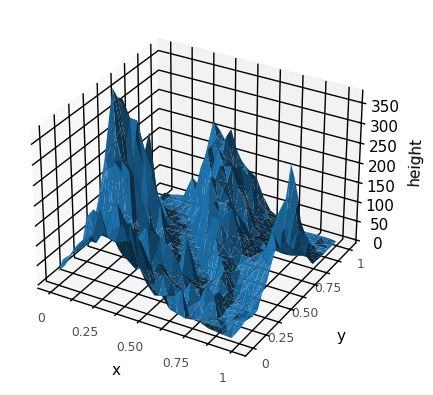

<ggplot: (8764698836646)>

In [20]:
p = (
    ggplot_3d(mt_bruno_long)
    + aes(x='x', y='y', z='height')
    + theme_minimal()
)
p + geom_polygon_3d(size=0.01)

As of 2022, mapping fill does NOT work due to a bug in matplotlib, help is needed to rebase and revive PR https://github.com/matplotlib/matplotlib/pull/12073:

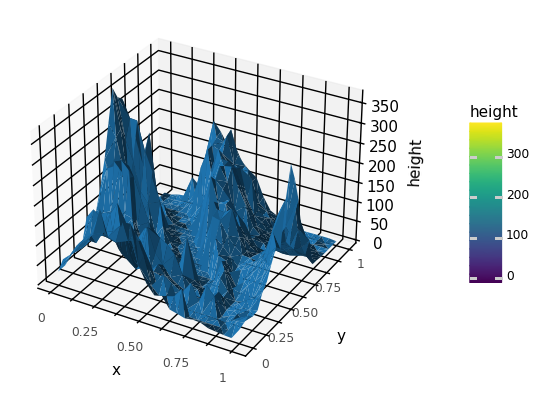

<ggplot: (8764699017087)>

In [21]:
p + geom_polygon_3d(size=0.01) + aes(fill='height')

You can change the lightsource:

In [22]:
from matplotlib.colors import LightSource

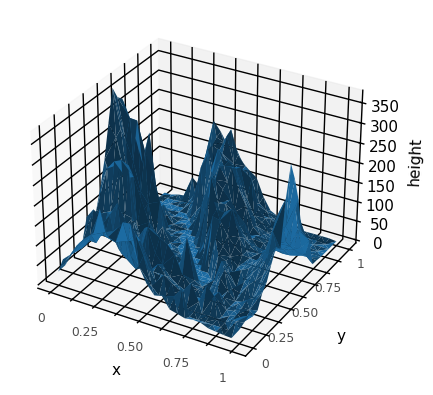

<ggplot: (8764698932682)>

In [23]:
p + geom_polygon_3d(
    size=0.01,
    lightsource=LightSource(azdeg=315, altdeg=45)
)

Disable shading:

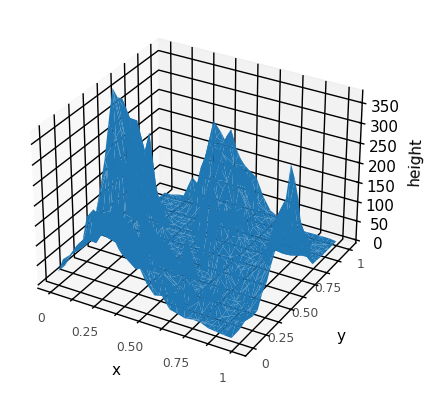

<ggplot: (8764694185957)>

In [24]:
p + geom_polygon_3d(
    size=0.01,
    shade=False
)

A self-contained example based on matplotlib's documentation:

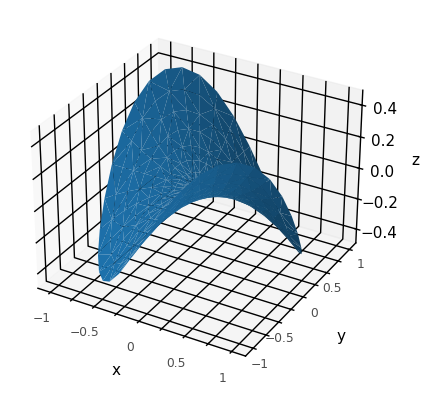

<ggplot: (8764694425625)>

In [25]:
n_radii = 8
n_angles = 36

radii = np.linspace(0.125, 1.0, n_radii)
angles = np.linspace(0, 2 * np.pi, n_angles, endpoint=False)[..., np.newaxis]

x = np.append(0, (radii * np.cos(angles)).flatten())
y = np.append(0, (radii * np.sin(angles)).flatten())

z = np.sin(-x * y)
df = pd.DataFrame(dict(x=x, y=y, z=z))

(
    ggplot_3d(df)
    + aes(x='x', y='y', z='z')
    + geom_polygon_3d(size=0.01)
    + theme_minimal()

)

## Voxels

Generate data as in matplotlib's [example](https://matplotlib.org/stable/gallery/mplot3d/voxels.html):

In [26]:
x, y, z = np.indices((8, 8, 8))

cube1 = (x < 3) & (y < 3) & (z < 3)
cube2 = (x >= 5) & (y >= 5) & (z >= 5)
link = abs(x - y) + abs(y - z) + abs(z - x) <= 2

voxelarray = cube1 | cube2 | link

colors = np.empty(voxelarray.shape, dtype=object)
colors[link] = 'link'  #
colors[cube1] = 'cube1'
colors[cube2] = 'cube2'

Convert to long format:

In [27]:
non_zero_voxels = np.where(voxelarray)
voxels_long = pd.DataFrame(
    np.vstack(non_zero_voxels).T,
    columns=['x', 'y', 'z']
)
voxels_long['object'] = np.vstack(colors[non_zero_voxels]).T[0]#[::-1]
voxels_long.head(3)

,x,y,z,object
0,0,0,0,cube1
1,0,0,1,cube1
2,0,0,2,cube1


In [28]:
from plotnine3d import geom_voxel_3d
from plotnine import xlim, ylim

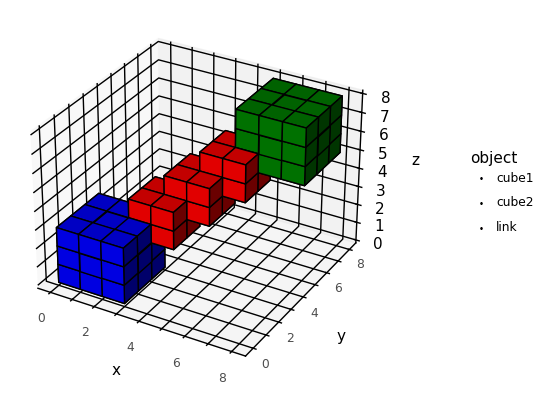

<ggplot: (8764698938658)>

In [29]:
(
    ggplot_3d(voxels_long)
    + aes(x='x', y='y', z='z', fill='object')
    + geom_voxel_3d(size=0.01)
    + theme_minimal()
    + ylim(0, 8)
    + xlim(0, 8)
    + scale_fill_manual(values={
        'link': 'red',
        'cube1': 'blue',
        'cube2': 'green'
    })
)

## Line

In [30]:
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)

In [31]:
data = pd.DataFrame(dict(x=x, y=y, z=z))
data['sign'] = (data['z'] > 0).replace({True: 'positive', False: 'negative'})
data.head(3)

,x,y,z,sign
0,2.449294e-15,5.000000,-2.000000,negative
1,1.215560e+00,4.684888,-1.959596,negative
2,2.277004e+00,4.092497,-1.919192,negative


In [32]:
from plotnine3d import geom_line_3d

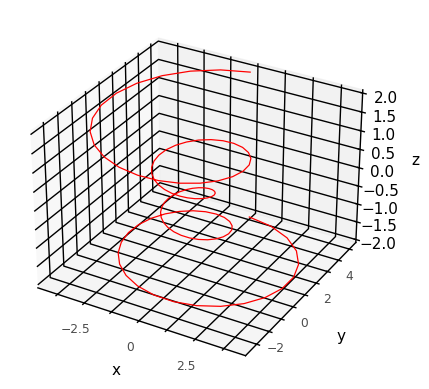

<ggplot: (8764694434413)>

In [33]:
(
    ggplot_3d(data)
    + aes(x='x', y='y', z='z')
    + geom_line_3d(color='red')
    + theme_minimal()
)

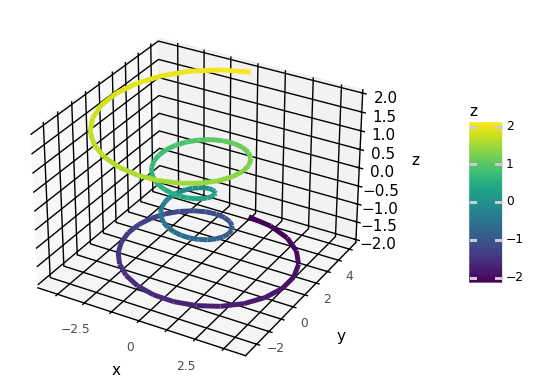

<ggplot: (8764698981298)>

In [34]:
(
    ggplot_3d(data)
    + aes(x='x', y='y', z='z', color='z')
    + geom_line_3d(size=2)
    + theme_minimal()
)

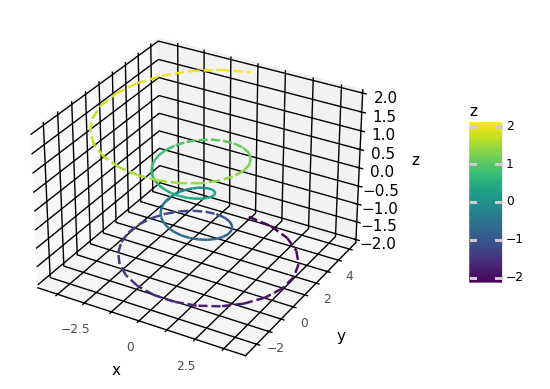

<ggplot: (8764698676764)>

In [35]:
(
    ggplot_3d(data)
    + aes(x='x', y='y', z='z', color='z')
    + geom_line_3d(linetype='dashed', size=1)
    + theme_minimal()
)

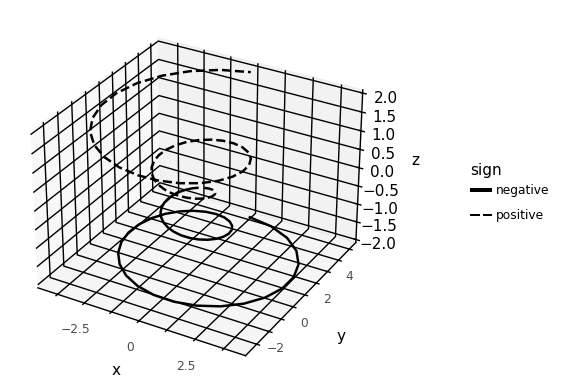

<ggplot: (8764694062481)>

In [36]:
(
    ggplot_3d(data)
    + aes(x='x', y='y', z='z', linetype='sign')
    + geom_line_3d(size=1)
    + theme_minimal()
)

# Interactive

First, install `ipympl`, e.g.:
    
```bash
pip install ipympl
```

Then, restart JupyterLab (required version 3 or newer) and configure matplotlib backend in notebook with:

In [37]:
%matplotlib widget

And enjoy interactive 3D plots by using the same code as in examples above (note it requires a running kernel, so it will not work when displayed on GitHub):

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
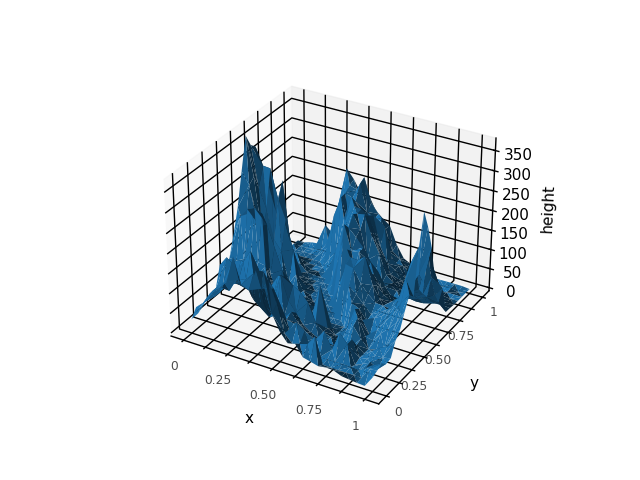

<ggplot: (8764702849750)>

In [38]:
p = (
    ggplot_3d(mt_bruno_long)
    + aes(x='x', y='y', z='height')
    + theme_minimal()
)
p + geom_polygon_3d(size=0.01)